# Project 2: Choosing a Model for Predicting on Unseen Data

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Anupriya DOMINIC, #13338590

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P2.ipynb**, then zip it and upload to Canvas

### Package usage
You <span style="color:red">**cannot**</span> use python machine learning package that can have the k-fold validation algorithm as embedded function, for instance, **sklearn** package.

# Project Description

For Project 2 you will create a regression program and choose a model to predict the women’s Olympic 100-meter race record time for year **2024** and **2028**. We will code the year of each race as we did in lecture 2.3. 

![caption](https://nianyil.people.clemson.edu/CPSC_4430/P2.jpg)


## Data File

A text file with the data is available on Canvas for the years 1928 through 2008 when the Olympics were held. The first line of the text file indicating there’re **m** lines of data and a **n** number of features (in this case, one). You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.

In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import numpy as np
from tabulate import tabulate
x, y = np.loadtxt('W100MTimes.txt', skiprows = 1, unpack = True)
x = x.tolist()
y = y.tolist()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Pick the Best Model

Your project assignment is to compare four different models, linear, quadratic, cubic, fourth, and fifth. 

- $h_w(x) = w_0 + w_1x$
- $h_w(x) = w_0 + w_1x + w_2x^2$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4$
- $h_w(x) = w_0 + w_1x + w_2x^2 + w_3x^3 + w_4x^4 + w_5x^5$


In [2]:
##############################################################################
#                 TODO: Define the regression models                         #
##############################################################################
def linear(x, y):
    x = np.column_stack([np.ones(len(x)),x])
    x = np.matrix(x)
    idx = len(y)
    y = np.matrix(y)
    y = np.reshape(y, (idx, 1))
    j_new, w_val = j(x,y)
    return j_new, w_val

def quadratic(x, y):
    x = np.column_stack([np.ones(len(x)),x,np.power(x, 2)])
    x = np.matrix(x)
    idx = len(y)
    y = np.matrix(y)
    y = np.reshape(y, (idx, 1))
    j_new, w_val = j(x,y)
    return j_new, w_val

def cubic(x, y):
    x = np.column_stack([np.ones(len(x)),x,np.power(x, 2),np.power(x, 3)])
    x = np.matrix(x)
    idx = len(y)
    y = np.matrix(y)
    y = np.reshape(y, (idx, 1))
    j_new, w_val = j(x,y)
    return j_new, w_val

def fourth(x, y):
    x = np.column_stack([np.ones(len(x)),x,np.power(x, 2),np.power(x, 3),np.power(x, 4)])
    x = np.matrix(x)
    idx = len(y)
    y = np.matrix(y)
    y = np.reshape(y, (idx, 1))
    j_new, w_val = j(x,y)
    return j_new, w_val

def fifth(x, y):
    x = np.column_stack([np.ones(len(x)),x,np.power(x, 2),np.power(x, 3),np.power(x, 4),np.power(x, 5)])
    x = np.matrix(x)
    idx = len(y)
    y = np.matrix(y)
    y = np.reshape(y, (idx, 1))
    j_new, w_val = j(x,y)
    return j_new, w_val

def w(x, y):
    x_trans = x.transpose()
    xtx = np.dot(x_trans,x)
    x_inv = np.linalg.inv(xtx)
    xty = np.dot(x_trans,y)
    return np.dot(x_inv,xty)

def j(x, y):
    m,n = np.shape(x)
    w_val = w(x,y)
    xw = np.dot(x,w_val)
    xw_y = np.subtract(xw,y)
    xw_yT = xw_y.transpose()
    J = np.dot(xw_yT,xw_y)
    return J*(1/m), w_val
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, you need to use <span style="color:red">**5-fold cross validation**</span> to pick out the best model for the prediction. You should present a chart of the error function $J$, similar to the one in the lecture (see below). You may need to use package like "**tabulate**" to print out the table.

```
                     Linear    Quadratic    Cubic    Fourth
-----------------  --------  -----------  -------  --------
1234                  10.25        24.25    12.25     23.25
5                     10.25        19.25    14.25     23.25
1235                  10.25        15.25    19.25     23.25
4                     10.25        10.25    20.25     23.25
1245                  10.25        24.25    12.25     23.25
3                     10.25        19.25    14.25     23.25
1345                  10.25        24.25    12.25     23.25
2                     10.25        19.25    14.25     23.25
2345                  10.25        24.25    12.25     23.25
1                     10.25        19.25    14.25     23.25
Mean for Training      0            0        0         0
Mean for Testing       0            0        0         0
```

You need to **plot** your training and testing $J$ with respect to the polynomial degree, similar to the one in the lecture.

In [3]:
##############################################################################
#                     TODO: 5-fold cross-validation                         #
##############################################################################
def c_linear(x,y,maxl,set_l):
    j_l = []
    for i in range(5):
        start = i*set_l
        end = (i+1)*set_l
        if end > maxl:
            end = maxl
        x_test = x[start:end]
        x_train = x[:start] + x[end:]
        y_test = y[start:end]
        y_train = y[:start] + y[end:]
        train_l, w_val = linear(x_train, y_train)
        j_l.append(train_l)
        _j = []
        for i in range(len(x_test)):
            _j.append(((w_val[0] + (w_val[1] * x_test[i])) - y_test[i]) ** 2)
        test_l = (sum(_j)/len(_j))
        j_l.append(test_l)
    return(j_l)

def c_quadratic(x,y,maxl,set_l):
    j_l = []
    for i in range(5):
        start = i*set_l
        end = (i+1)*set_l
        if end > maxl:
            end = maxl
        x_test = x[start:end]
        x_train = x[:start] + x[end:]
        y_test = y[start:end]
        y_train = y[:start] + y[end:]
        train_l, w_val = quadratic(x_train, y_train)
        j_l.append(train_l)
        _j = []
        for i in range(len(x_test)):
            _j.append(((w_val[0] + (w_val[1] * x_test[i]) + (w_val[2] * (x_test[i]) ** 2)) - y_test[i]) ** 2)
        test_l = (sum(_j)/len(_j))
        j_l.append(test_l)
    return(j_l)

def c_cubic(x,y,maxl,set_l):
    j_l = []
    for i in range(5):
        start = i*set_l
        end = (i+1)*set_l
        if end > maxl:
            end = maxl
        x_test = x[start:end]
        x_train = x[:start] + x[end:]
        y_test = y[start:end]
        y_train = y[:start] + y[end:]
        train_l, w_val = cubic(x_train, y_train)
        j_l.append(train_l)
        _j = []
        for i in range(len(x_test)):
            _j.append(((w_val[0] + (w_val[1] * x_test[i]) + (w_val[2] * (x_test[i]) ** 2) + (w_val[3] * (x_test[i]) ** 3)) - y_test[i]) ** 2)
        test_l = (sum(_j)/len(_j))
        j_l.append(test_l)
    return(j_l)

def c_fourth(x,y,maxl,set_l):
    j_l = []
    for i in range(5):
        start = i*set_l
        end = (i+1)*set_l
        if end > maxl:
            end = maxl
        x_test = x[start:end]
        x_train = x[:start] + x[end:]
        y_test = y[start:end]
        y_train = y[:start] + y[end:]
        train_l, w_val = fourth(x_train, y_train)
        j_l.append(train_l)
        _j = []
        for i in range(len(x_test)):
            _j.append(((w_val[0] + (w_val[1] * x_test[i]) + (w_val[2] * (x_test[i]) ** 2) + (w_val[3] * (x_test[i]) ** 3) + (w_val[4] * (x_test[i]) ** 4)) - y_test[i]) ** 2)
        test_l = (sum(_j)/len(_j))
        j_l.append(test_l)
    return(j_l)


def c_fifth(x,y,maxl,set_l):
    j_l = []
    for i in range(5):
        start = i*set_l
        end = (i+1)*set_l
        if end > maxl:
            end = maxl
        x_test = x[start:end]
        x_train = x[:start] + x[end:]
        y_test = y[start:end]
        y_train = y[:start] + y[end:]
        train_4, w_val = fifth(x_train, y_train)
        j_l.append(train_4)
        _j = []
        for i in range(len(x_test)):
            _j.append(((w_val[0] + (w_val[1] * x_test[i]) + (w_val[2] * (x_test[i]) ** 2) + (w_val[3] * (x_test[i]) ** 3) + (w_val[4] * (x_test[i]) ** 4) + (w_val[5] * (x_test[i]) ** 5)) - y_test[i]) ** 2)
        test_4 = (sum(_j)/len(_j))
        j_l.append(test_4)
    return(j_l)

# len of data
maxl = len(y)
set_l = int(np.round(maxl/5))



f0 = ['2345', '1', '1345', '2', '1245', '3', '1235', '4', '1234', '5', 'Mean for Training', 'Mean for Testing']
c = c_linear(x,y,maxl,set_l)
f1 = c
f1 += (np.mean(c[::2]),np.mean(c[::-2]))
c = c_quadratic(x,y,maxl,set_l)
f2 = c
f2 += (np.mean(c[::2]),np.mean(c[::-2]))
c = c_cubic(x,y,maxl,set_l)
f3 = c
f3 += (np.mean(c[::2]),np.mean(c[::-2]))
c = c_fourth(x,y,maxl,set_l)
f4 = c
f4 += (np.mean(c[::2]),np.mean(c[::-2]))
c = c_fifth(x,y,maxl,set_l)
f5 = c
f5 += (np.mean(c[::2]),np.mean(c[::-2]),)
table = zip(f0, f1, f2, f3, f4, f5)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [4]:
##############################################################################
#                     TODO: Print out the table chart                       #
##############################################################################
print(tabulate(table, headers=['', 'linear', 'quadratic', 'cubic', 'fourth', 'fifth']))
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

                      linear    quadratic       cubic      fourth        fifth
-----------------  ---------  -----------  ----------  ----------  -----------
2345               0.0328357    0.0255338  0.0253479   0.0248284     0.0196647
1                  0.199419     0.115478   0.305187    0.844881    162.881
1345               0.0499416    0.0351405  0.0344135   0.0344134     0.0210399
2                  0.042401     0.0362219  0.0341031   0.0341011     0.101601
1245               0.0536374    0.0426519  0.041096    0.0410866     0.0279304
3                  0.0314573    0.0073972  0.00945486  0.00953152    0.0498741
1235               0.0460154    0.0327898  0.0326936   0.0314057     0.0239151
4                  0.0643973    0.0516594  0.0572937   0.0854885     0.0851933
1234               0.0383639    0.0354708  0.0349359   0.0320274     0.03099
5                  0.176176     0.0677583  0.0351024   0.478374      0.0335638
Mean for Training  0.0441588    0.0343173  0.0336974   0.03

mean train [0.04415879565458873, 0.03431734815593875, 0.03369737166732471, 0.032752286967813724, 0.024708023901688882]
mean test [0.10277007842853011, 0.05570305662544049, 0.08822817564790772, 0.2904751612099076, 32.63015558242556]


Text(0, 0.5, 'Squared Error Cost Function (J)')

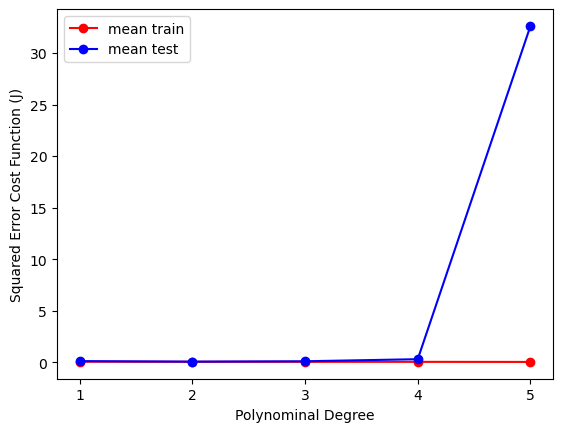

In [5]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
mean_train = [f1[10],f2[10],f3[10],f4[10],f5[10]]
mean_test = [f1[11],f2[11],f3[11],f4[11],f5[11]]
x_ax = [1, 2, 3, 4, 5]
print('mean train', mean_train)
print('mean test',mean_test)
import matplotlib.pyplot as plt
plt.plot(x_ax, mean_train,marker = 'o',c = 'r')
plt.plot(x_ax, mean_test,marker = 'o',c = 'b')
plt.xticks(np.arange(min(x_ax), max(x_ax)+1, 1.0))
plt.legend(['mean train', 'mean test'])
plt.xlabel("Polynominal Degree")
plt.ylabel("Squared Error Cost Function (J)")
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss **which model is the best** for the record time prediction.

**Your Answer:**  Quadratic model is the best, because it have the minimum test loss.

Next, compute the final weights of the best model utilizing the **complete data set**

In [6]:
##############################################################################
#              TODO: Calculate the final regression model                    #
##############################################################################
train_loss, w_quad = quadratic(x, y)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Prediction Using the Best Model

Write a Python program that takes a **year** as input, then outputs the winning women’s Olympic 100-meter **race time** for that year (round to two decimal places). You need to try and print out the results of **2024** and **2028**.

In [7]:
##############################################################################
#         TODO: Predict the race time using the best model                   #
##############################################################################
year = 124
pred = w_quad[0] + (w_quad[1] * year) + (w_quad[2] * (year) ** 2)
print('Predicted race time for 2024', pred)

year = 128
pred = w_quad[0] + (w_quad[1] * year) + (w_quad[2] * (year) ** 2)
print('Predicted race time for 2028', pred)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Predicted race time for 2024 [[10.9410643]]
Predicted race time for 2028 [[10.97609121]]


## Prediction Error on 2024

What is the acture of women's 100m final in 2024 Olympics?

Your answer:

In [8]:
print('Actual women\'s 100m time for 2024 is : ', 10.72)

Actual women's 100m time for 2024 is :  10.72


What is the Prediction Error of year 2024?

Your answer:

In [9]:
# Precicted - Actual time
# 10.94 - 10.72
print('Prediction Error of year 2024 is : ', np.subtract(10.94, 10.72))

Prediction Error of year 2024 is :  0.21999999999999886
